**Fruits Classification**

Fruits are an essential component of our diet and come in a wide variety of shapes, sizes, colors, and textures. Classifying them manually can be a time-consuming and error-prone task. However, with advancements in computer vision and machine learning, we can automate this process efficiently.
The classification task involves training a CNN model on a dataset consisting of images of various fruits. Each fruit category contains a diverse range of images captured under different lighting conditions, angles, and backgrounds. The trained model learns to extract meaningful features from these images and distinguish between different fruit types with high accuracy.
In this project, we will explore the entire pipeline of fruit classification, including data collection, preprocessing, model development, training, evaluation, and deployment. By the end of this endeavor, we aim to develop a robust and accurate fruit classification system that can generalize well to unseen fruit images.



Importing necessary libraries

In [ ]:
import os
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import matplotlib.pyplot as plt

Listing files in the training directory

In [ ]:
os.listdir('/content/drive/MyDrive/Project File/Fruits_classification/train')

['Guava',
 'Papaya',
 'Strawberry',
 'Mango',
 'Orange',
 'Banana',
 'Kiwi',
 'Watermelon',
 'Apple']

Listing files in the testing directory

In [ ]:
os.listdir('/content/drive/MyDrive/Project File/Fruits_classification/test')

['Watermelon',
 'Guava',
 'Apple',
 'Kiwi',
 'Banana',
 'Strawberry',
 'Papaya',
 'Orange',
 'Mango']

Defining paths for training and testing data directories

In [ ]:
train_datadir='/content/drive/MyDrive/Project File/Fruits_classification/train'
test_datadir='/content/drive/MyDrive/Project File/Fruits_classification/test'

Iterating through each category(training)

In [ ]:
X_train=[]
y_train=[]
categories=['Guava','Papaya','Strawberry','Mango','Apple','Orange','Banana','Kiwi','Watermelon']
for i in categories:
  print("Loading...",i)
  path=os.path.join(train_datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,3))
    X_train.append(img_resized)
    y_train.append(categories.index(i))
  print("....Completed....")

Loading... Guava
....Completed....
Loading... Papaya
....Completed....
Loading... Strawberry
....Completed....
Loading... Mango
....Completed....
Loading... Apple
....Completed....
Loading... Orange
....Completed....
Loading... Banana
....Completed....
Loading... Kiwi
....Completed....
Loading... Watermelon
....Completed....


In [ ]:
img_array.shape

(195, 235, 3)

In [ ]:
img_resized.shape

(150, 150, 3)

Iterating through each category(testing)

In [ ]:
X_test=[]
y_test=[]
categories=['Guava','Papaya','Strawberry','Mango','Apple','Orange','Banana','Kiwi','Watermelon']
for i in categories:
  print("Loading....",i)
  path=os.path.join(test_datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,3))
    X_test.append(img_resized)
    y_test.append(categories.index(i))
  print("...Completed...")

Loading.... Guava
...Completed...
Loading.... Papaya
...Completed...
Loading.... Strawberry
...Completed...
Loading.... Mango
...Completed...
Loading.... Apple
...Completed...
Loading.... Orange
...Completed...
Loading.... Banana
...Completed...
Loading.... Kiwi
...Completed...
Loading.... Watermelon
...Completed...


In [ ]:
img_array.shape

(195, 235, 3)

In [ ]:
img_resized.shape

(150, 150, 3)

Plotting histogram for training and testing set

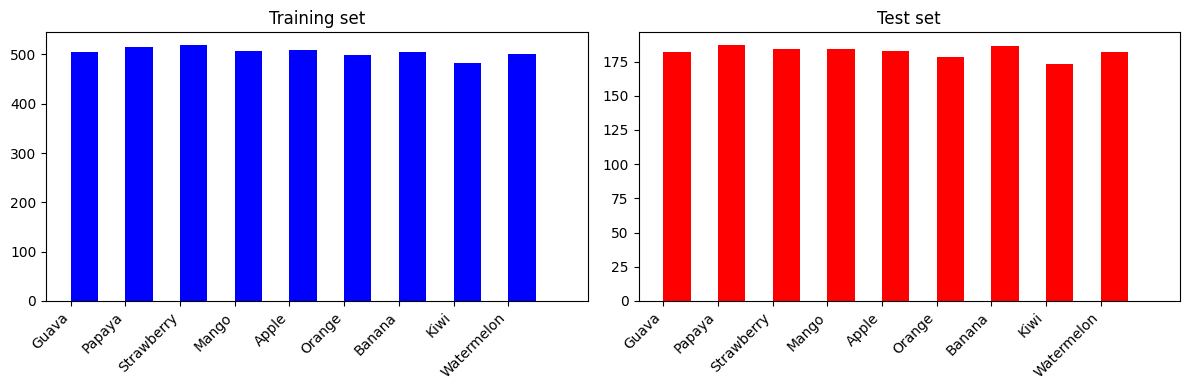

In [ ]:
category_names = ['Guava', 'Papaya', 'Strawberry', 'Mango', 'Apple', 'Orange', 'Banana', 'Kiwi', 'Watermelon']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(y_train, bins=range(10), width=0.5, color='blue')
axes[0].set_title('Training set')
axes[0].set_xticks(range(9))
axes[0].set_xticklabels(category_names, rotation=45, ha='right')

axes[1].hist(y_test, bins=range(10), width=0.5, color='red')
axes[1].set_title('Test set')
axes[1].set_xticks(range(9))
axes[1].set_xticklabels(category_names, rotation=45, ha='right')

plt.tight_layout()

plt.show()

Converting lists to numpy arrays

In [ ]:
import numpy as np
X_trainnp=np.array(X_train)
y_trainnp=np.array(y_train)
X_testnp=np.array(X_test)
y_testnp=np.array(y_test)

In [ ]:
X_trainnp.shape

(4545, 150, 150, 3)

In [ ]:
y_trainnp.shape

(4545,)

In [ ]:
X_testnp.shape

(1639, 150, 150, 3)

In [ ]:
y_testnp.shape

(1639,)

Architecture of a Convolutional Neural Network

In [ ]:
cnn=Sequential()
#convulution layer
cnn.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
#max pool layer
cnn.add(MaxPool2D(2,2))
#convulution layer
cnn.add(Conv2D(32,(3,3),activation='relu'))
#max pool layer
cnn.add(MaxPool2D(2,2))
#flatten layer
cnn.add(Flatten())
cnn.add(Dense(100,activation='relu'))
cnn.add(Dense(9,activation='softmax'))

Compiling the model

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Training the model

In [ ]:
cnn.fit(X_trainnp,y_trainnp,epochs=10,batch_size=10)

Epoch 1/10
455/455 [==============================] - 109s 237ms/step - loss: 0.2434 - accuracy: 0.9386
Epoch 2/10
455/455 [==============================] - 102s 225ms/step - loss: 0.0491 - accuracy: 0.9877
Epoch 3/10
455/455 [==============================] - 102s 224ms/step - loss: 0.0224 - accuracy: 0.9936
Epoch 4/10
455/455 [==============================] - 103s 227ms/step - loss: 0.0389 - accuracy: 0.9886
Epoch 5/10
455/455 [==============================] - 102s 224ms/step - loss: 0.0101 - accuracy: 0.9971
Epoch 6/10
455/455 [==============================] - 104s 229ms/step - loss: 0.0190 - accuracy: 0.9943
Epoch 7/10
455/455 [==============================] - 104s 229ms/step - loss: 0.0130 - accuracy: 0.9963
Epoch 8/10
455/455 [==============================] - 102s 224ms/step - loss: 0.0329 - accuracy: 0.9905
Epoch 9/10
455/455 [==============================] - 102s 225ms/step - loss: 0.0278 - accuracy: 0.9945
Epoch 10/10
455/455 [==============================] - 102s 224m

Evaluating the model on testing data

In [ ]:
cnn.evaluate(X_testnp,y_testnp)

52/52 [==============================] - 11s 199ms/step - loss: 0.1957 - accuracy: 0.9799


[0.19573324918746948, 0.9798657894134521]

Save the trained CNN model to a file

In [ ]:
cnn.save("fruits_classification_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
